In [1]:
#Import the library for overview the dataset and data pre-processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [2]:
#Load the dataset and view the first five row of dataset
df = pd.read_csv('diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
#Check the dataset got null value or not
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
Sudden Weight Loss    0
Weakness              0
Polyphagia            0
Genital Thrush        0
Visual Blurring       0
Itching               0
Irritability          0
Delayed Healing       0
Partial Paresis       0
Muscle Stiffness      0
Alopecia              0
Obesity               0
Class                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   Sudden Weight Loss  520 non-null    object
 5   Weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital Thrush      520 non-null    object
 8   Visual Blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  Delayed Healing     520 non-null    object
 12  Partial Paresis     520 non-null    object
 13  Muscle Stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

# Data Visualization

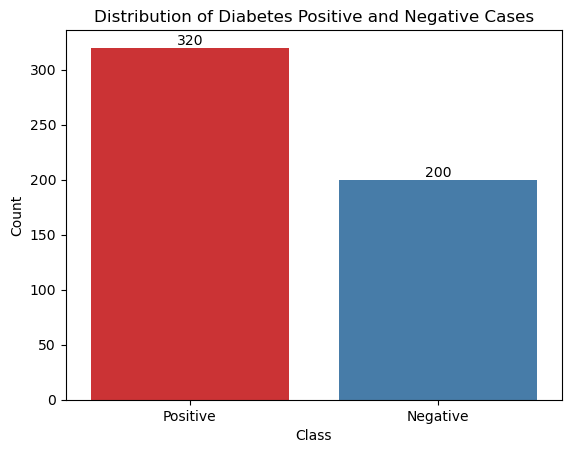

In [5]:
count_df = df['Class'].value_counts().reset_index().rename(columns={'index': 'Class', 'Class': 'Count'})

ax = sns.barplot(x='Class', y='Count', data=count_df, palette="Set1")
plt.title("Distribution of Diabetes Positive and Negative Cases")
plt.xlabel("Class")
plt.ylabel("Count")

# Add count labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

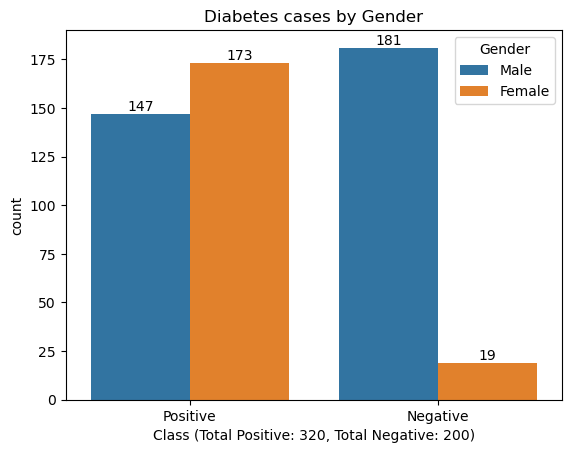

In [6]:
ax = sns.countplot(x='Class', data=df, hue='Gender')

plt.title("Diabetes cases by Gender")

total_counts = df['Class'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_positive = total_counts['Positive']
total_negative = total_counts['Negative']

plt.xlabel('Class (Total Positive: {}, Total Negative: {})'.format(total_positive, total_negative))
    
plt.show()

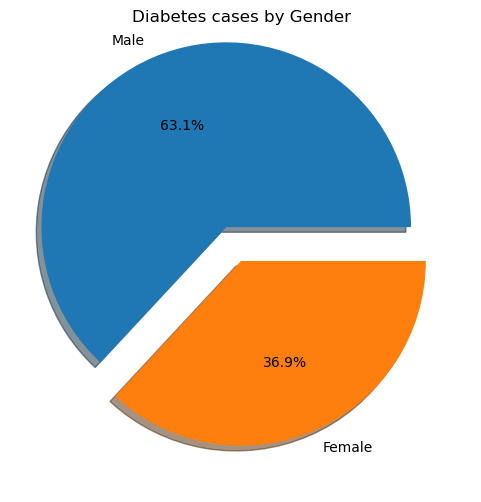

In [7]:
# Count the number of cases by gender
gender_counts = df['Gender'].value_counts()

# Create a pie chart with percentage
myexplode = [0.2, 0]
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', explode = myexplode, shadow = True)
plt.title("Diabetes cases by Gender")
plt.show()


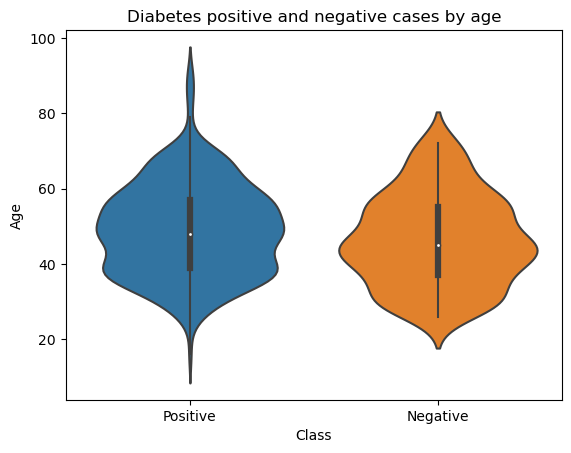

In [8]:
sns.violinplot(x="Class", y="Age", data=df)
plt.title("Diabetes positive and negative cases by age")
plt.show()

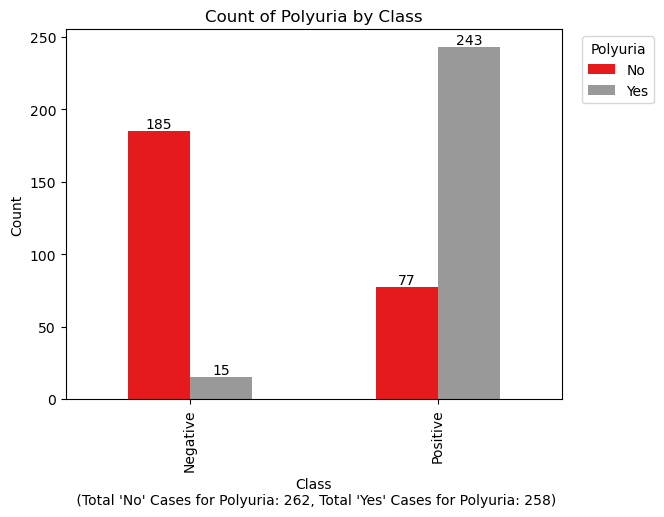

In [9]:
data_grouped = df.groupby(['Class', 'Polyuria']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Polyuria by Class')
plt.legend(title='Polyuria', loc='upper right',bbox_to_anchor=(1.2, 1.0))

total_counts = df['Polyuria'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Polyuria: {}, Total \'Yes\' Cases for Polyuria: {})'.format(total_no, total_yes))

plt.show()

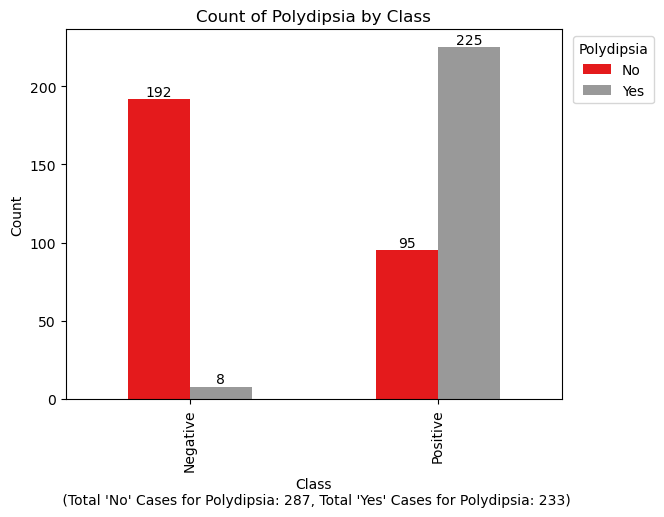

In [10]:
data_grouped = df.groupby(['Class', 'Polydipsia']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Polydipsia by Class')
plt.legend(title='Polydipsia', loc='upper right',bbox_to_anchor=(1.2, 1.0))

total_counts = df['Polydipsia'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Polydipsia: {}, Total \'Yes\' Cases for Polydipsia: {})'.format(total_no, total_yes))

plt.show()

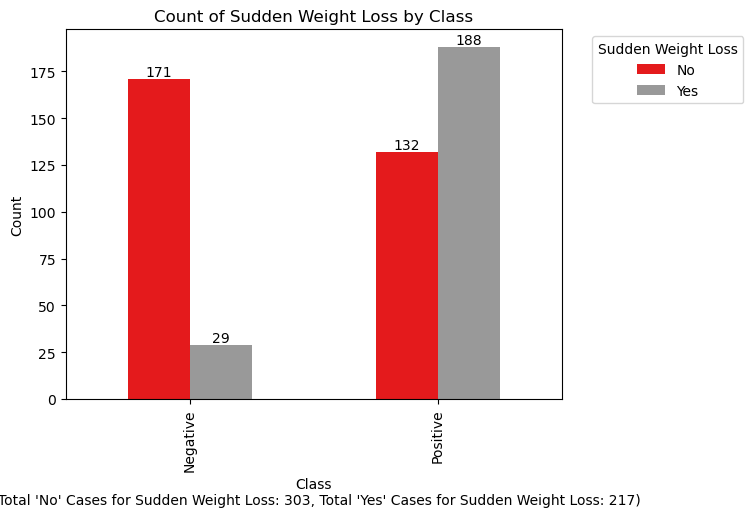

In [11]:
data_grouped = df.groupby(['Class', 'Sudden Weight Loss']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.ylabel('Count')
plt.title('Count of Sudden Weight Loss by Class')
plt.legend(title='Sudden Weight Loss', loc='upper right',bbox_to_anchor=(1.38, 1.0))

total_counts = df['Sudden Weight Loss'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Sudden Weight Loss: {}, Total \'Yes\' Cases for Sudden Weight Loss: {})'.format(total_no, total_yes))

plt.show()

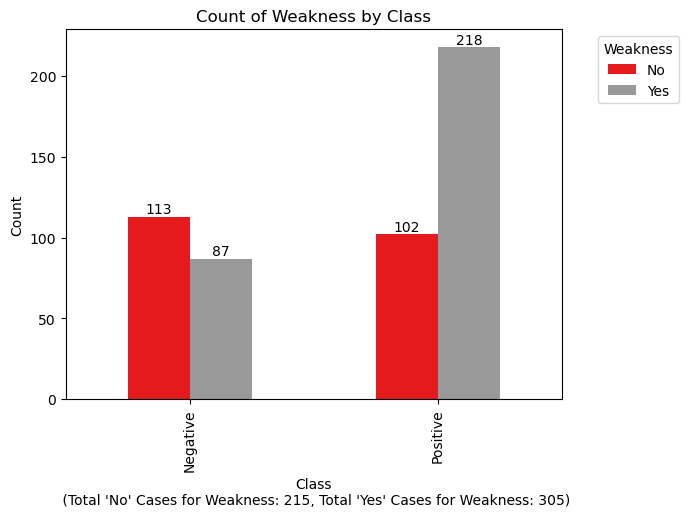

In [12]:
data_grouped = df.groupby(['Class', 'Weakness']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Weakness by Class')
plt.legend(title='Weakness', loc='upper right',bbox_to_anchor=(1.25, 1.0))

total_counts = df['Weakness'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Weakness: {}, Total \'Yes\' Cases for Weakness: {})'.format(total_no, total_yes))
plt.show()

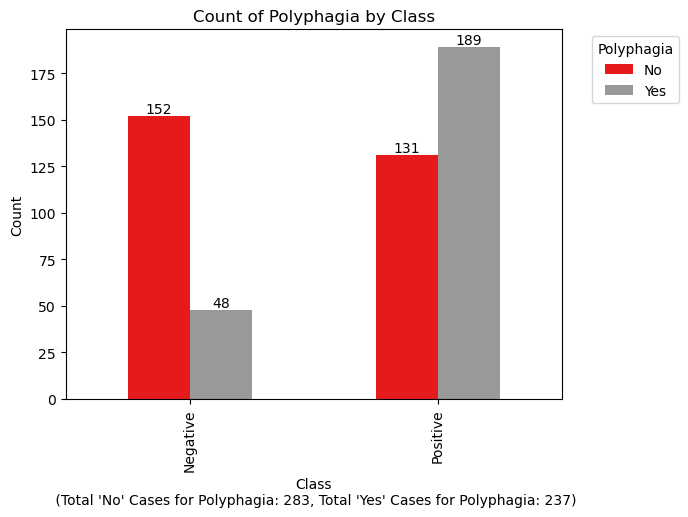

In [13]:
data_grouped = df.groupby(['Class', 'Polyphagia']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Polyphagia by Class')
plt.legend(title='Polyphagia', loc='upper right',bbox_to_anchor=(1.25, 1.0))

total_counts = df['Polyphagia'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Polyphagia: {}, Total \'Yes\' Cases for Polyphagia: {})'.format(total_no, total_yes))
plt.show()

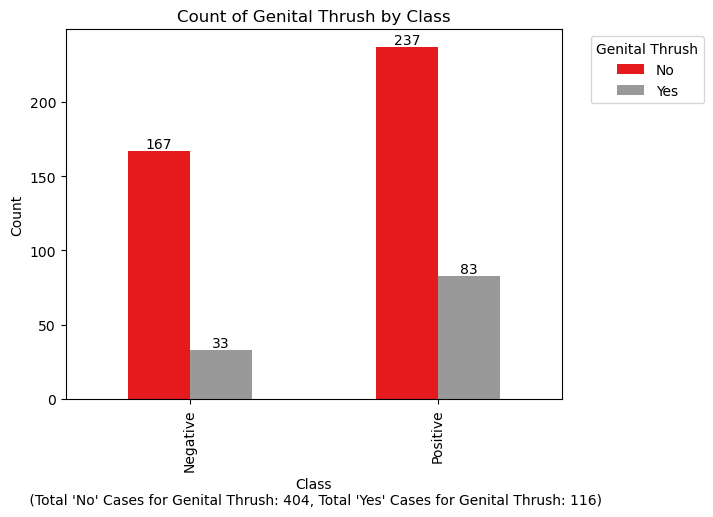

In [14]:
data_grouped = df.groupby(['Class', 'Genital Thrush']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Genital Thrush by Class')
plt.legend(title='Genital Thrush', loc='upper right',bbox_to_anchor=(1.3, 1.0))

total_counts = df['Genital Thrush'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Genital Thrush: {}, Total \'Yes\' Cases for Genital Thrush: {})'.format(total_no, total_yes))
plt.show()

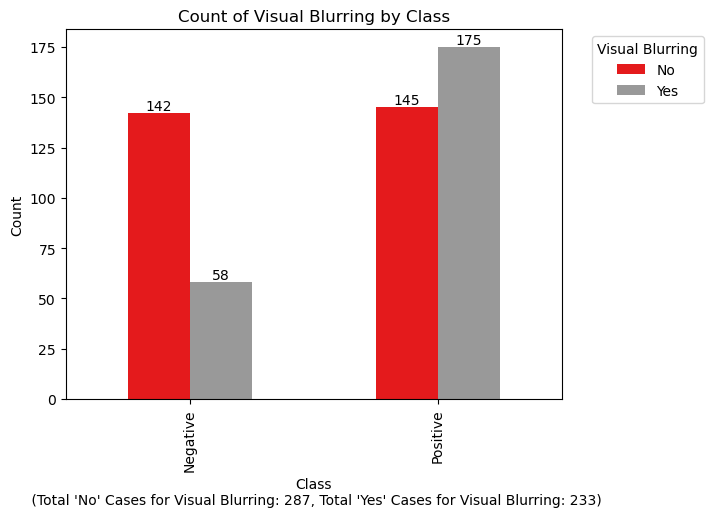

In [15]:
data_grouped = df.groupby(['Class', 'Visual Blurring']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Visual Blurring by Class')
plt.legend(title='Visual Blurring', loc='upper right',bbox_to_anchor=(1.3, 1.0))

total_counts = df['Visual Blurring'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')
total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Visual Blurring: {}, Total \'Yes\' Cases for Visual Blurring: {})'.format(total_no, total_yes))

plt.show()

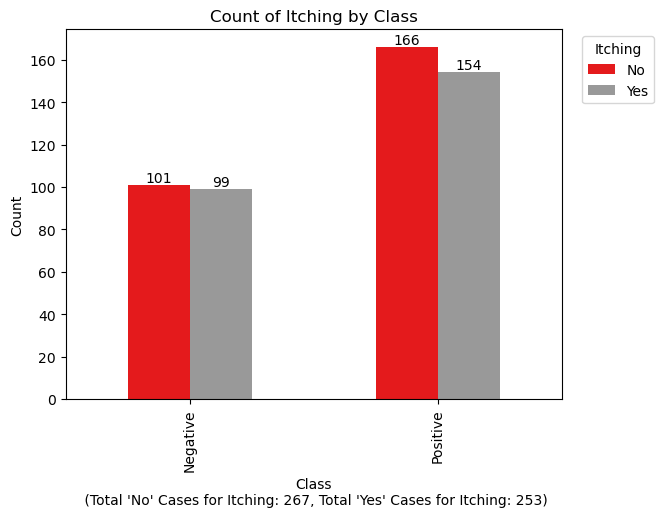

In [16]:
data_grouped = df.groupby(['Class', 'Itching']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Itching by Class')
plt.legend(title='Itching', loc='upper right',bbox_to_anchor=(1.2, 1.0))

total_counts = df['Itching'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Itching: {}, Total \'Yes\' Cases for Itching: {})'.format(total_no, total_yes))

plt.show()

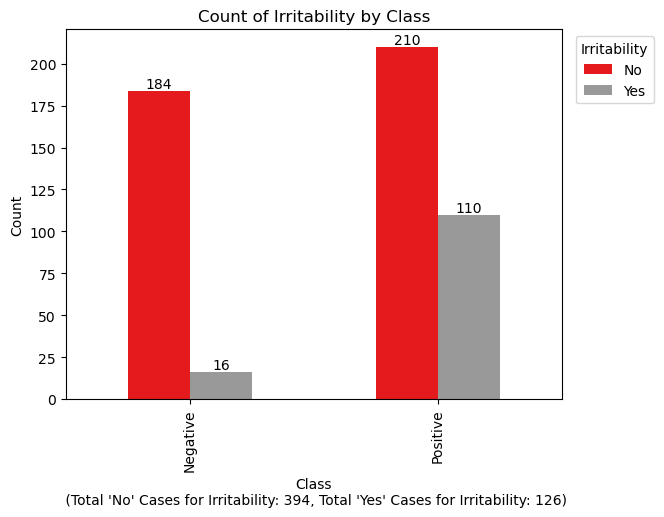

In [17]:
data_grouped = df.groupby(['Class', 'Irritability']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Irritability by Class')
plt.legend(title='Irritability', loc='upper right',bbox_to_anchor=(1.2, 1.0))

total_counts = df['Irritability'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Irritability: {}, Total \'Yes\' Cases for Irritability: {})'.format(total_no, total_yes))
plt.show()

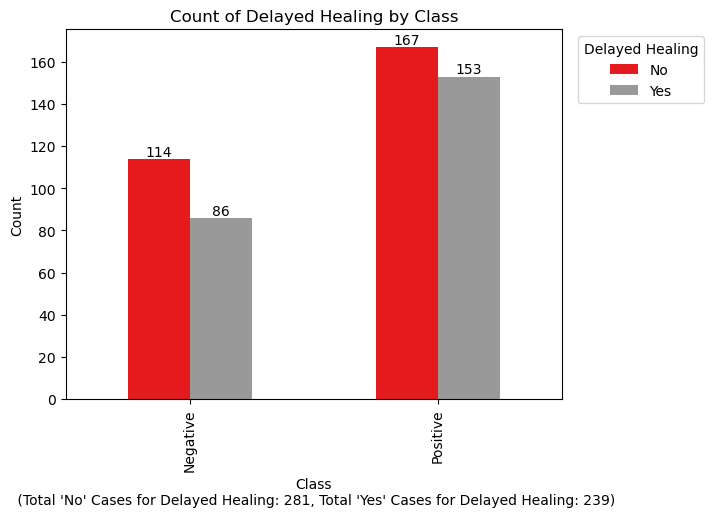

In [18]:
data_grouped = df.groupby(['Class', 'Delayed Healing']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Delayed Healing by Class')
plt.legend(title='Delayed Healing', loc='upper right',bbox_to_anchor=(1.3, 1.0))

total_counts = df['Delayed Healing'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Delayed Healing: {}, Total \'Yes\' Cases for Delayed Healing: {})'.format(total_no, total_yes))

plt.show()

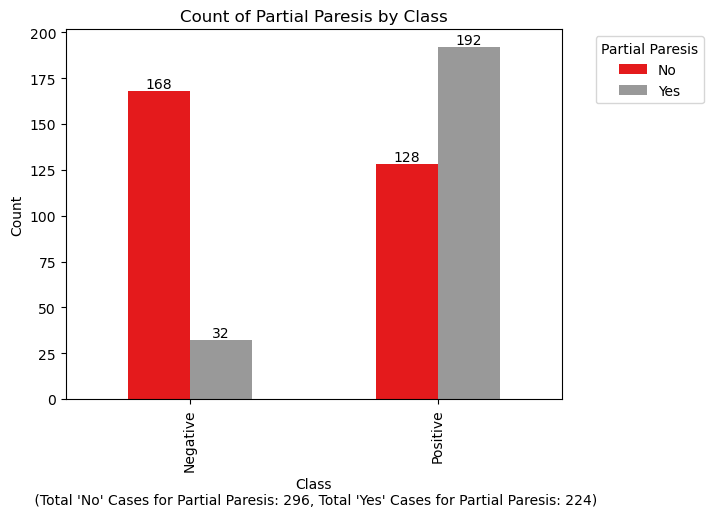

In [19]:
data_grouped = df.groupby(['Class', 'Partial Paresis']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Partial Paresis by Class')
plt.legend(title='Partial Paresis', loc='upper right',bbox_to_anchor=(1.3, 1.0))

total_counts = df['Partial Paresis'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Partial Paresis: {}, Total \'Yes\' Cases for Partial Paresis: {})'.format(total_no, total_yes))

plt.show()

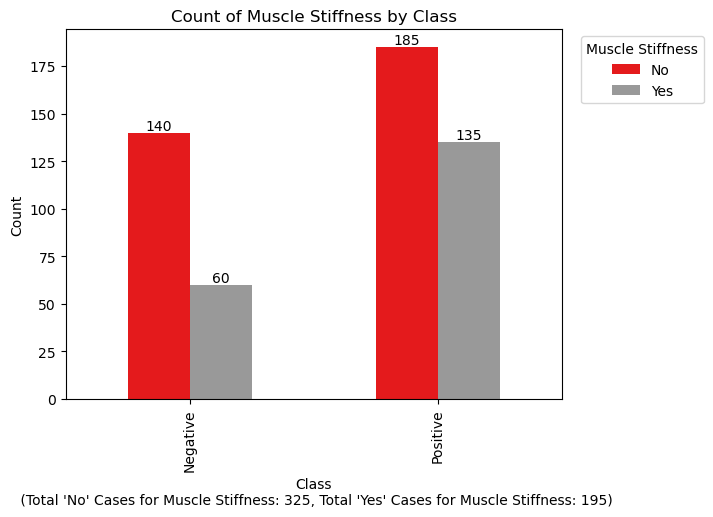

In [20]:
data_grouped = df.groupby(['Class', 'Muscle Stiffness']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Muscle Stiffness by Class')
plt.legend(title='Muscle Stiffness', loc='upper right',bbox_to_anchor=(1.3, 1.0))

total_counts = df['Muscle Stiffness'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Muscle Stiffness: {}, Total \'Yes\' Cases for Muscle Stiffness: {})'.format(total_no, total_yes))

plt.show()

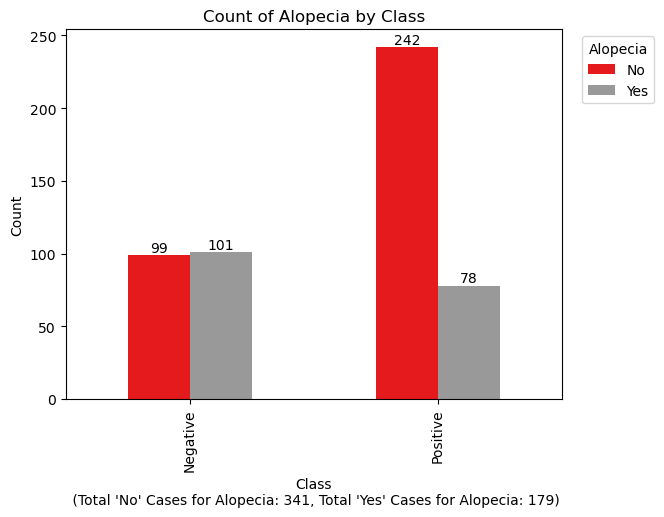

In [21]:
data_grouped = df.groupby(['Class', 'Alopecia']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')

plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Alopecia by Class')
plt.legend(title='Alopecia', loc='upper right',bbox_to_anchor=(1.2, 1.0))

total_counts = df['Alopecia'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Alopecia: {}, Total \'Yes\' Cases for Alopecia: {})'.format(total_no, total_yes))
plt.show()

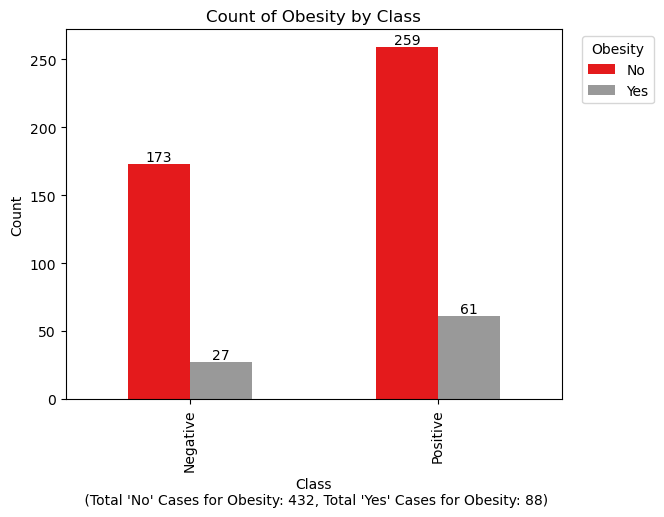

In [22]:
data_grouped = df.groupby(['Class', 'Obesity']).size().unstack(fill_value=0)

# Create a grouped bar chart
ax = data_grouped.plot(kind='bar', stacked=False, colormap='Set1')
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Count of Obesity by Class')
plt.legend(title='Obesity', loc='upper right',bbox_to_anchor=(1.2, 1.0))

total_counts = df['Obesity'].value_counts()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

total_yes = total_counts['Yes']
total_no = total_counts['No']

plt.xlabel('Class\n (Total \'No\' Cases for Obesity: {}, Total \'Yes\' Cases for Obesity: {})'.format(total_no, total_yes))
plt.show()

# Data Preparation/Preprocessing 

In [23]:
#Transform the Yes/No value into 1/0
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Class'] = df['Class'].map({'Positive':1,'Negative':0})
df['Polyuria'] = df['Polyuria'].map({'Yes':1,'No':0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes':1,'No':0})
df['Sudden Weight Loss'] = df['Sudden Weight Loss'].map({'Yes':1,'No':0})
df['Weakness'] = df['Weakness'].map({'Yes':1,'No':0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes':1,'No':0})
df['Genital Thrush'] = df['Genital Thrush'].map({'Yes':1,'No':0})
df['Visual Blurring'] = df['Visual Blurring'].map({'Yes':1,'No':0})
df['Itching'] = df['Itching'].map({'Yes':1,'No':0})
df['Irritability'] = df['Irritability'].map({'Yes':1,'No':0})
df['Delayed Healing'] = df['Delayed Healing'].map({'Yes':1,'No':0})
df['Partial Paresis'] = df['Partial Paresis'].map({'Yes':1,'No':0})
df['Muscle Stiffness'] = df['Muscle Stiffness'].map({'Yes':1,'No':0})
df['Alopecia'] = df['Alopecia'].map({'Yes':1,'No':0})
df['Obesity'] = df['Obesity'].map({'Yes':1,'No':0})

In [24]:
#To see the dataset after the encdoding process 
df.head()

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


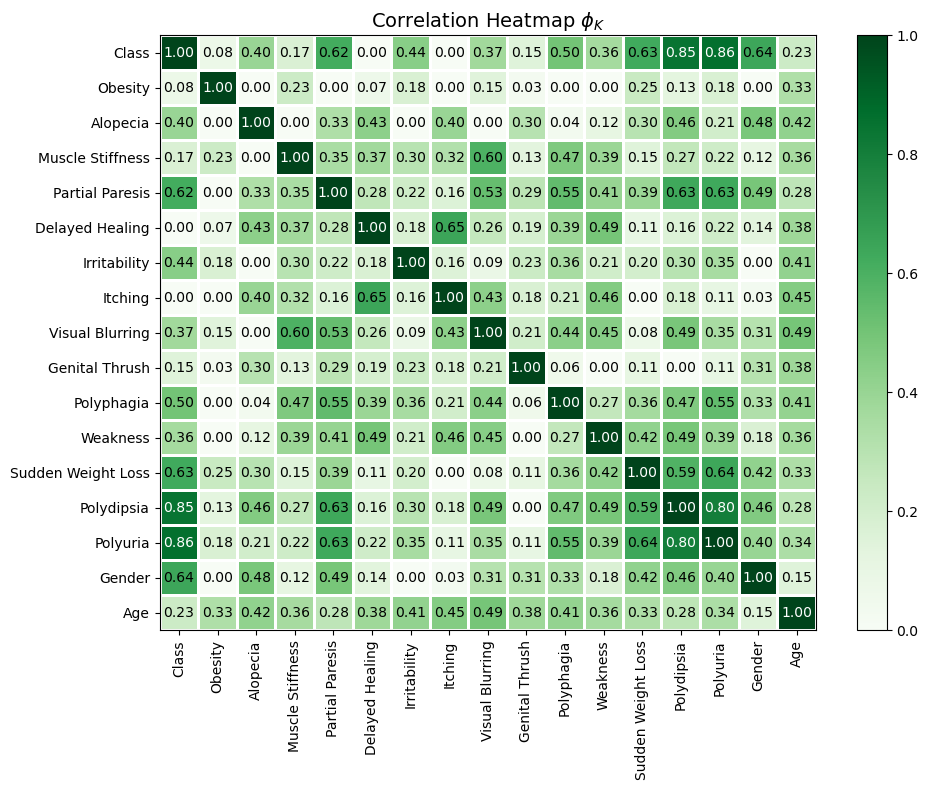

In [25]:
#Show the correlation between the features using Phik (𝜙 k) 
#The Phik library need to be installed before import it. 
#Install the library into the Anaconda Command Prompt by using following code:
#conda install -c conda-forge phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval_cols = ['Class', 'Obesity', 'Alopecia', 'Muscle Stiffness', 'Partial Paresis', 'Delayed Healing', 'Irritability', 'Itching', 'Visual Blurring', 
                 'Genital Thrush', 'Polyphagia', 'Weakness', 'Sudden Weight Loss', 'Polydipsia', 'Polyuria', 'Gender', 'Age']
phik_overview = df.phik_matrix(interval_cols=interval_cols)
phik_overview.round(2)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Correlation Heatmap $\phi_K$", 
                        fontsize_factor=1.0, 
                        figsize=(10, 8))

plt.tight_layout()

In [26]:
#Select Features
X = df[['Age','Gender','Polyuria','Polydipsia','Sudden Weight Loss','Weakness','Polyphagia',
        'Visual Blurring','Irritability','Partial Paresis','Alopecia']]
y = df['Class']

#Show the database for selected feature
X


,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Visual Blurring,Irritability,Partial Paresis,Alopecia
0,40,1,0,1,0,1,0,0,0,0,1
1,58,1,0,0,0,1,0,1,0,1,1
2,41,1,1,0,0,1,1,0,0,0,1
3,45,1,0,0,1,1,1,0,0,0,0
4,60,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0
516,48,0,1,1,1,1,1,0,1,1,0
517,58,0,1,1,1,1,1,1,0,1,0
518,32,0,0,0,0,1,0,1,0,0,1


In [27]:
#balance the data
#Balancing dataset by oversampling 
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
counter = Counter(y)
print('Before', counter)

X_sm, y_sm = smt.fit_resample(X, y)

counter = Counter(y_sm)
print ('After', counter)

Before Counter({1: 320, 0: 200})
After Counter({1: 320, 0: 320})


In [28]:
#Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size = 0.2,random_state=0)

# Modeling

# Support Vector Machine (SVM)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

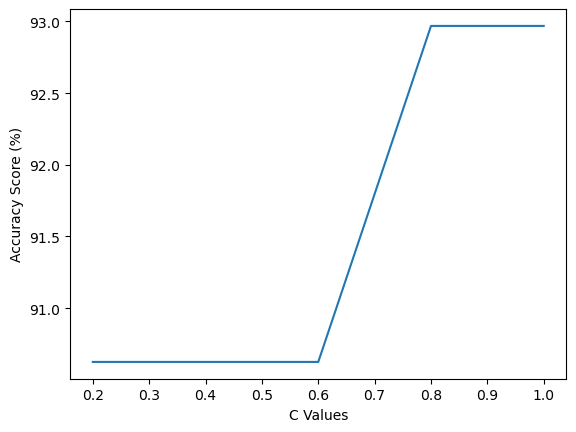

In [30]:
from sklearn.svm import SVC

#SVM Regularization Evaluation
from sklearn.metrics import accuracy_score
cScores = [] 
for c in [0.2,0.4,0.6,0.8,1.0]:
    svm_clf=SVC(C=c, kernel='linear')
    svm_clf.fit(X_train,y_train)
    result=svm_clf.predict(X_test)

    accuracy = accuracy_score(y_test, result) * 100
    cScores.append(accuracy)

plt.plot([0.2,0.4,0.6,0.8,1.0], cScores)
plt.xlabel("C Values")
plt.ylabel("Accuracy Score (%)")
plt.show()

In [31]:
#Fit the training data into SVM model
clfSVM = SVC(kernel='linear', C=1.0, random_state = 10, probability=True)
clfSVM.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=10)

Support Vector Machine Results
---------------------------------------------------------
Accuracy: 92.97%


Confusion Matrix


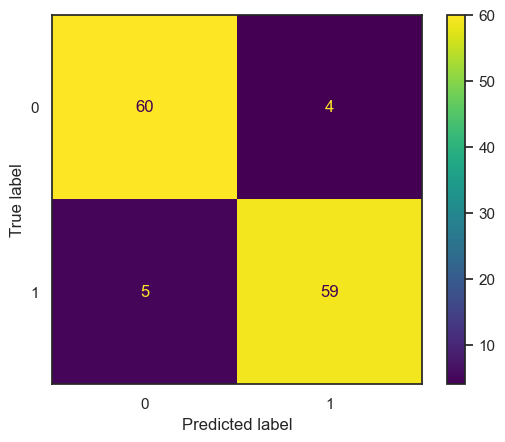



Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.94      0.92      0.93        64

    accuracy                           0.93       128
   macro avg       0.93      0.93      0.93       128
weighted avg       0.93      0.93      0.93       128



AUC-ROC of SVM

No Skill: ROC AUC=0.500
SVM     : ROC AUC=0.949


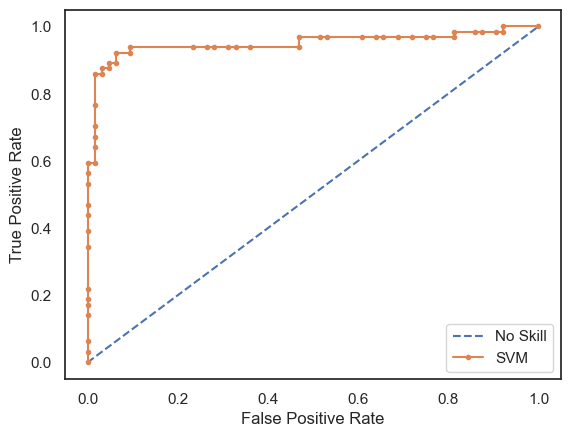

In [32]:
#To calculate and obtain the Confusion Matrix and Classification Report
clfSVMscore= clfSVM.score(X_test, y_test)
clfSVM_pred = clfSVM.predict(X_test)
clfSVM_cm = confusion_matrix(y_test,clfSVM_pred)
dispcmSVM = ConfusionMatrixDisplay(confusion_matrix=clfSVM_cm,
                            display_labels=clfSVM.classes_)
clfSVM_cr = classification_report(y_test,clfSVM_pred)

#To show the accuracy, confusion matrix and classification report
sns.set(style="white")
print('Support Vector Machine Results')
print('---------------------------------------------------------')
print('Accuracy: {:.2f}%'.format(clfSVMscore *100))
print('\n')
print('Confusion Matrix')
dispcmSVM.plot()
plt.show()
print('\n')
print('Classification Report')
print(clfSVM_cr) 
print('\n')

#Show the AUC-ROC of SVM 
ns_probs = [0 for _ in range(len(y_test))]
svm_probs = clfSVM.predict_proba(X_test)
svm_probs = svm_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
#Score
print('AUC-ROC of SVM\n')
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM     : ROC AUC=%.3f' % (svm_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#show the plot
plt.show()

# Decision Tree

In [33]:
#Fit the training data into Decision Tree model
from sklearn import tree
clfDT = tree.DecisionTreeClassifier()
clfDT.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Results
------------------------------
Accuracy: 97.66%


Confusion Matrix


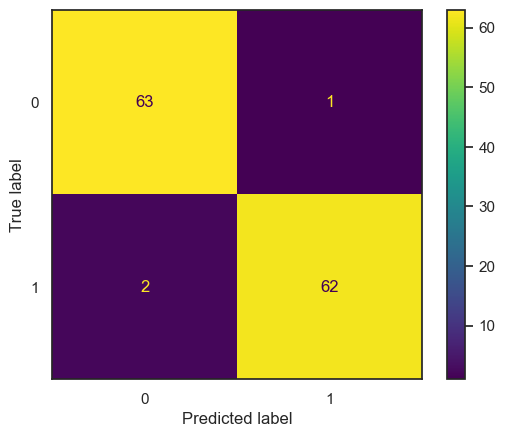



Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.98      0.97      0.98        64

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



AUC-ROC of SVM

No Skill     : ROC AUC=0.500
Decision Tree: ROC AUC=0.977


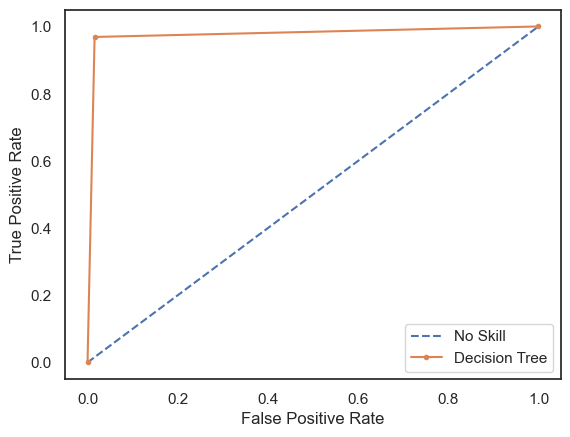

In [34]:
#To calculate and obtain the Confusion Matrix and Classification Report
clfDTscore= clfDT.score(X_test, y_test)
clfDT_pred = clfDT.predict(X_test)
clfDT_cm = confusion_matrix(y_test,clfDT_pred)
dispcmDT = ConfusionMatrixDisplay(confusion_matrix=clfDT_cm,
                            display_labels=clfDT.classes_)
clfDT_cr = classification_report(y_test,clfDT_pred)

#To show the accuracy, confusion matrix and classification report
print('Decision Tree Results')
print('------------------------------')
print('Accuracy: {:.2f}%'.format(clfDTscore *100))
print('\n')
print('Confusion Matrix')
dispcmDT.plot()
plt.show()
print('\n')
print('Classification Report')
print(clfDT_cr) 
print('\n')

#Show the AUC-ROC of Decision Tree 
ns_probs = [0 for _ in range(len(y_test))]
dt_probs = clfDT.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
print('AUC-ROC of Decision Tree\n')
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

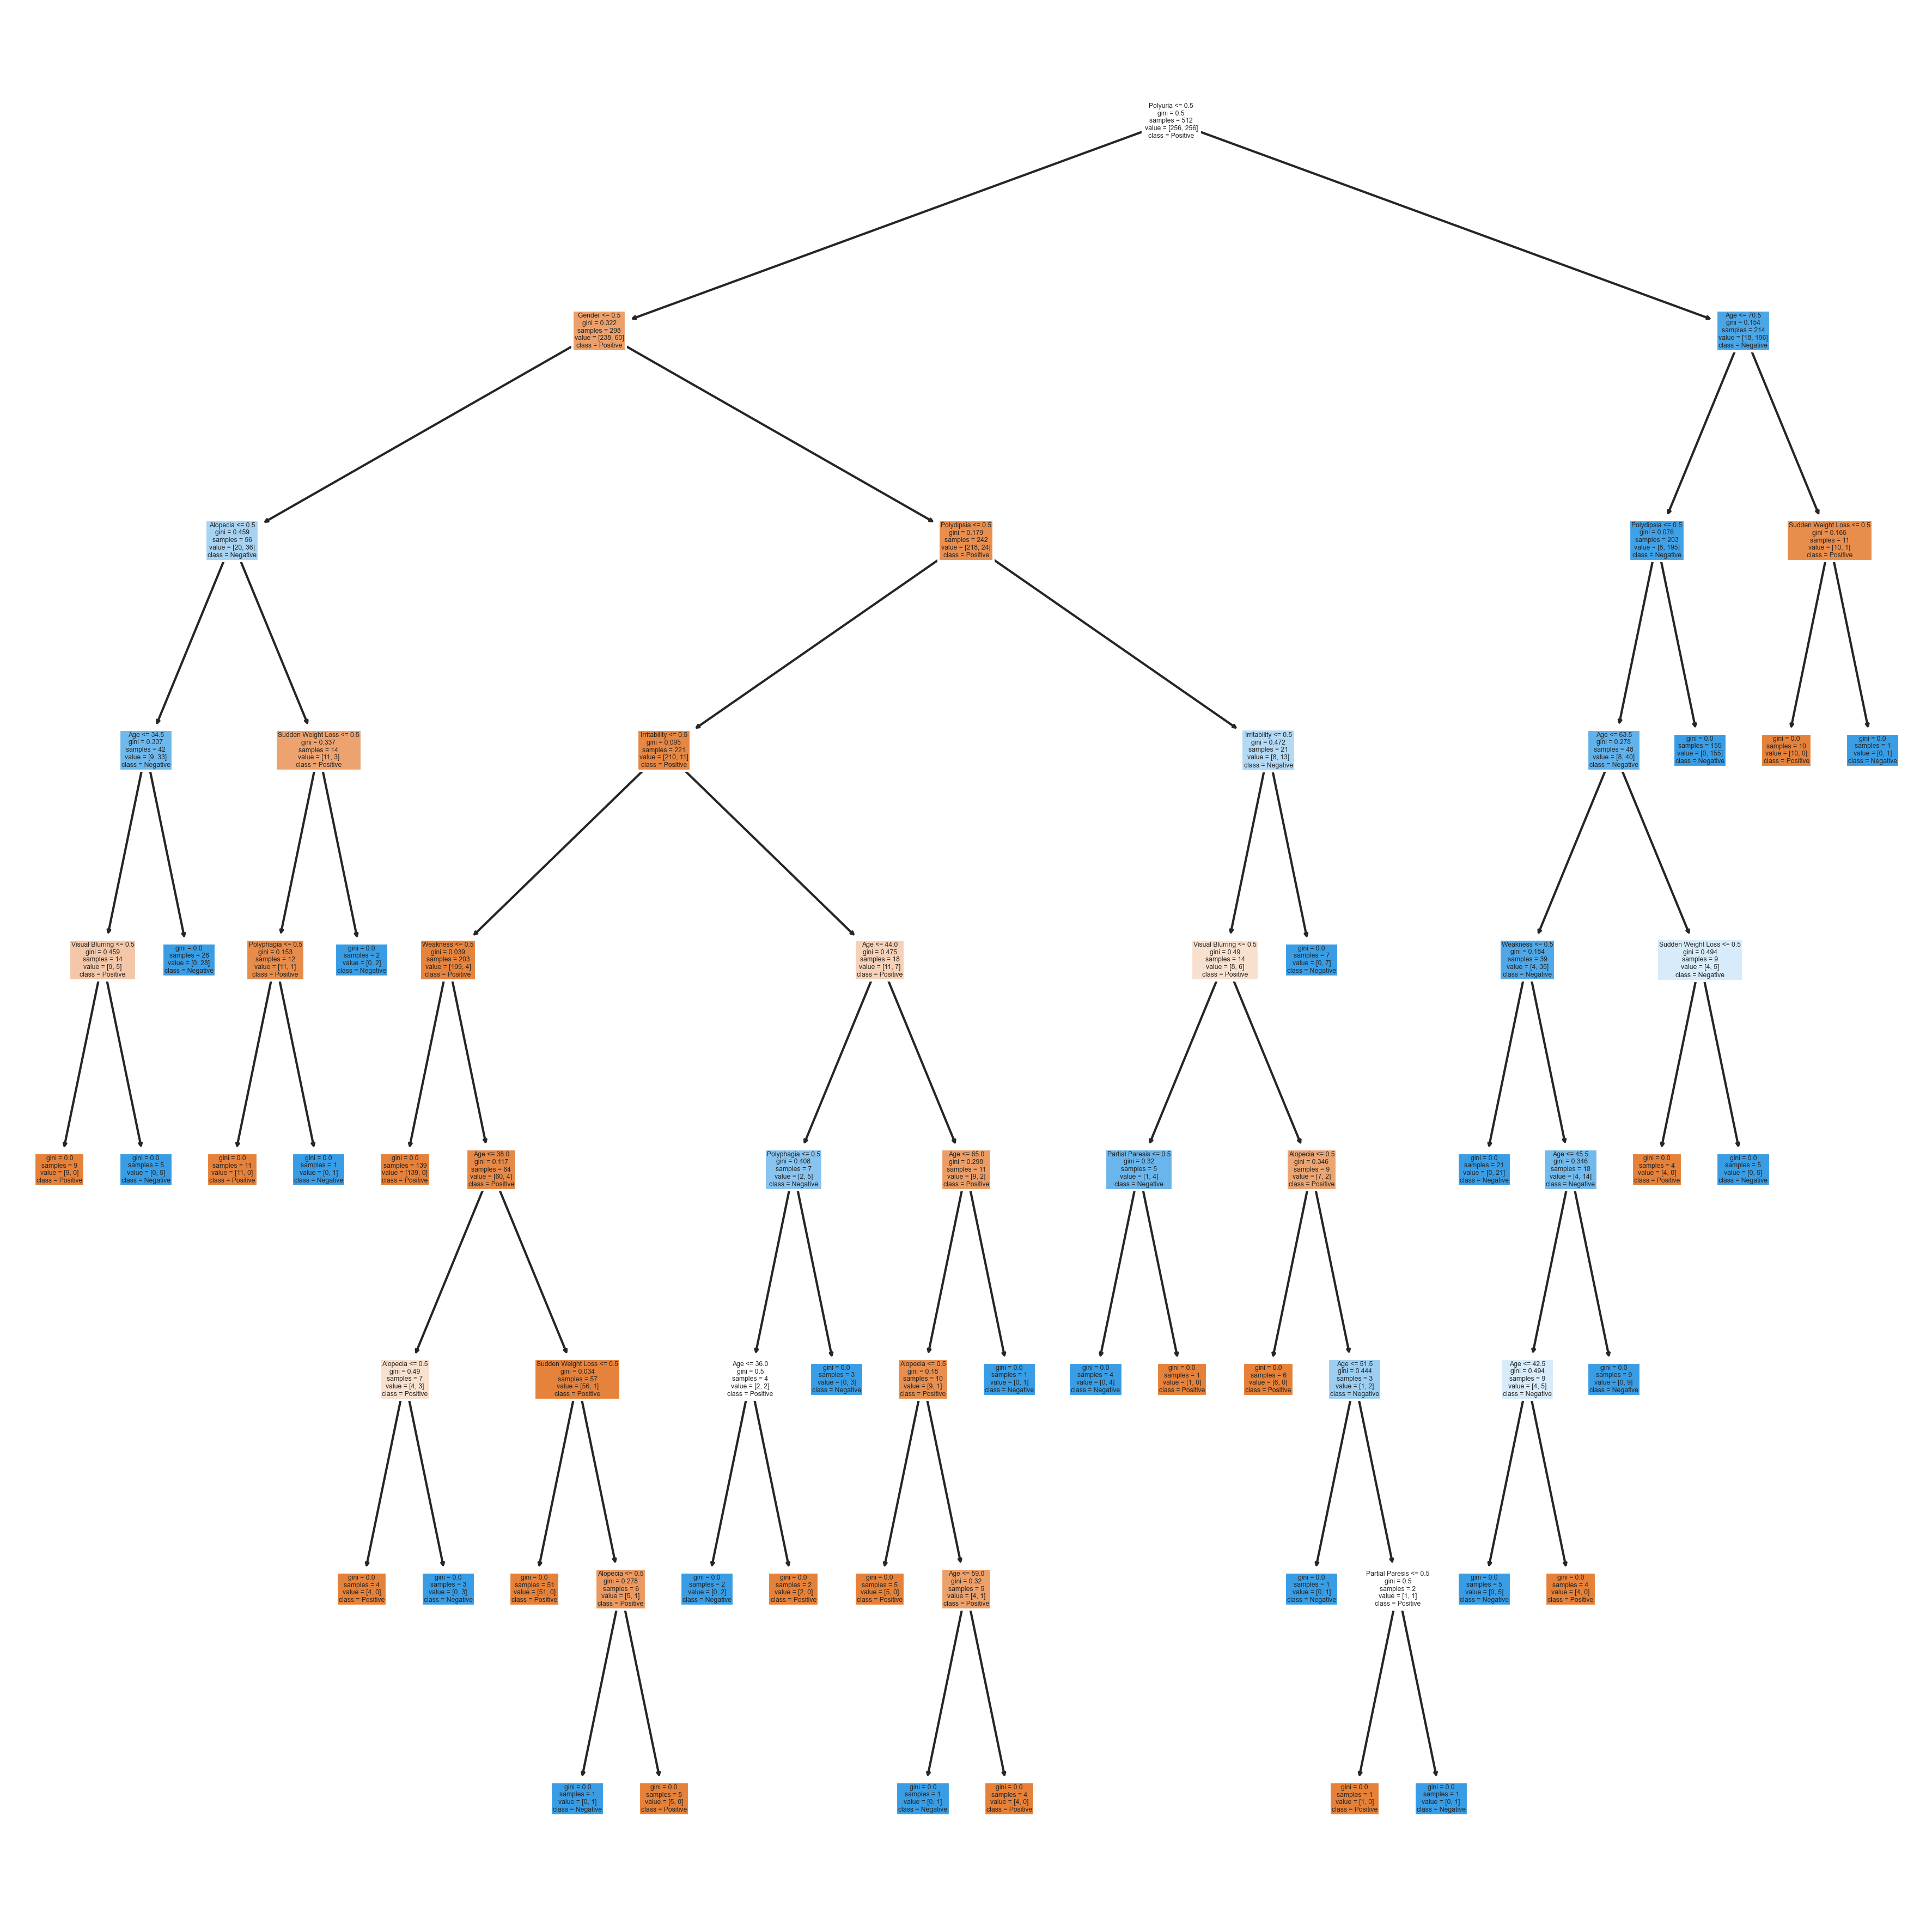

In [35]:
fn = ['Age','Gender','Polyuria','Polydipsia','Sudden Weight Loss','Weakness','Polyphagia',
        'Visual Blurring','Irritability','Partial Paresis','Alopecia']
cn = ['Positive', 'Negative']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15), dpi = 300)

tree.plot_tree(clfDT, feature_names = fn, class_names = cn, filled = True);
#fig.savefig('../../Pictures/DecisionTree.png')

# Naïve Bayes

In [36]:
#Fit the training data into Naïve Bayes model
from sklearn.naive_bayes import GaussianNB
clfNB = GaussianNB()
clfNB.fit(X_train, y_train)

GaussianNB()

Naïve Bayes Results
---------------------------------------------------------
Accuracy: 89.06%


Confusion Matrix


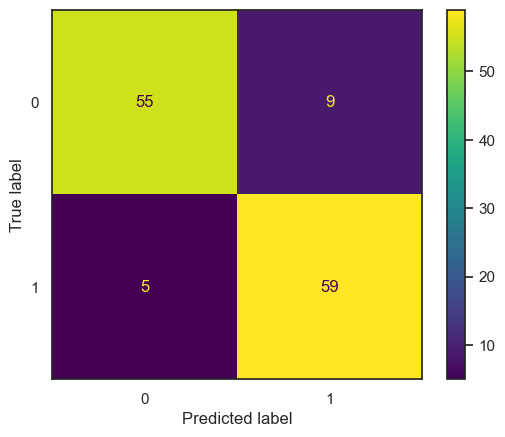



Classification Report
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        64
           1       0.87      0.92      0.89        64

    accuracy                           0.89       128
   macro avg       0.89      0.89      0.89       128
weighted avg       0.89      0.89      0.89       128



AUC-ROC of Naïve Bayes

No Skill   : ROC AUC=0.500
Naïve Bayes: ROC AUC=0.969


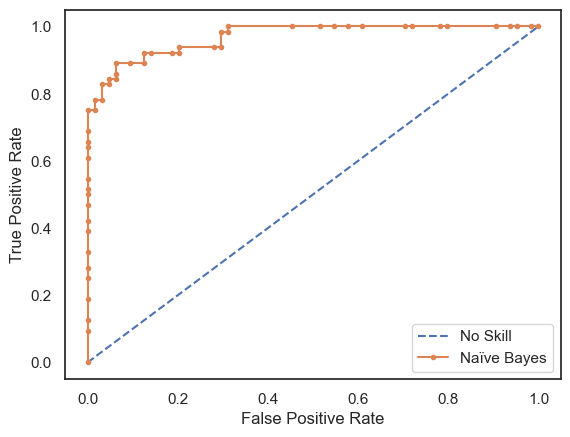

In [37]:
#To calculate and obtain the Confusion Matrix and Classification Report
clfNBscore= clfNB.score(X_test, y_test)
clfNB_pred = clfNB.predict(X_test)
clfNB_cm = confusion_matrix(y_test,clfNB_pred)
dispcmNB = ConfusionMatrixDisplay(confusion_matrix=clfNB_cm,
                            display_labels=clfNB.classes_)
clfNB_cr = classification_report(y_test,clfNB_pred)

#To show the accuracy, confusion matrix and classification report
print('Naïve Bayes Results')
print('---------------------------------------------------------')
print('Accuracy: {:.2f}%'.format(clfNBscore *100))
print('\n')
print('Confusion Matrix')
dispcmNB.plot()
plt.show()
print('\n')
print('Classification Report')
print(clfNB_cr) 
print('\n')

#Show the AUC-ROC of Naïve Bayes 
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = clfNB.predict_proba(X_test)
nb_probs = nb_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
#Score
print('AUC-ROC of Naïve Bayes\n')
print('No Skill   : ROC AUC=%.3f' % (ns_auc))
print('Naïve Bayes: ROC AUC=%.3f' % (nb_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naïve Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#show the plot
plt.show()

# K-Nearest Neighbours (KNN)

In [38]:
#Fit the training data into KNN model
from sklearn.neighbors import KNeighborsClassifier
clfKNN = KNeighborsClassifier(n_neighbors = 11)
clfKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

K-Nearest Neighbors Results
---------------------------------------------------------
Accuracy: 85.16%


Confusion Matrix


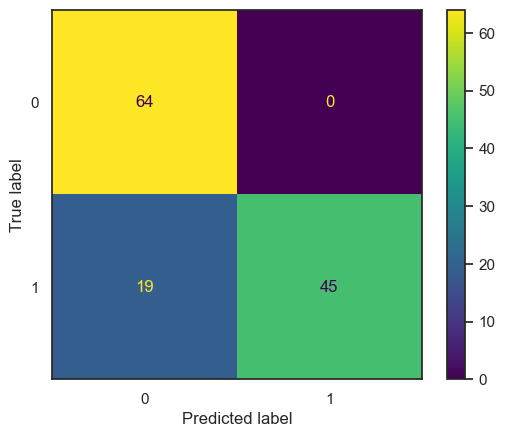



Classification Report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        64
           1       1.00      0.70      0.83        64

    accuracy                           0.85       128
   macro avg       0.89      0.85      0.85       128
weighted avg       0.89      0.85      0.85       128



AUC-ROC of K-Nearest Neighbors

No Skill: ROC AUC = 0.500
KNN     : ROC AUC = 0.948


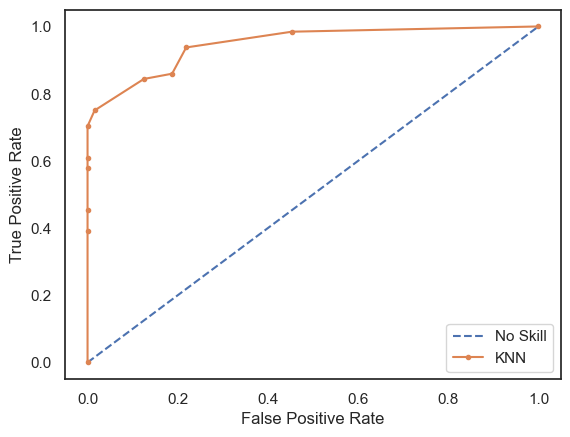

In [39]:
#To calculate and obtain the Confusion Matrix and Classification Report
clfKNNscore= clfKNN.score(X_test, y_test)
clfKNN_pred = clfKNN.predict(X_test)
clfKNN_cm = confusion_matrix(y_test,clfKNN_pred)
dispcmKNN = ConfusionMatrixDisplay(confusion_matrix=clfKNN_cm,
                            display_labels=clfKNN.classes_)
clfKNN_cr = classification_report(y_test,clfKNN_pred)

#To show the accuracy, confusion matrix and classification report
print('K-Nearest Neighbors Results')
print('---------------------------------------------------------')
print('Accuracy: {:.2f}%'.format(clfKNNscore *100))
print('\n')
print('Confusion Matrix')
dispcmKNN.plot()
plt.show()
print('\n')
print('Classification Report')
print(clfKNN_cr) 
print('\n')

#Show the AUC-ROC of KNN 
ns_probs = [0 for _ in range(len(y_test))]
knn_probs = clfKNN.predict_proba(X_test)
knn_probs = knn_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
#Score
print('AUC-ROC of K-Nearest Neighbors\n')
print('No Skill: ROC AUC = %.3f' % (ns_auc))
print('KNN     : ROC AUC = %.3f' % (knn_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#show the plot
plt.show()

# Evaluation

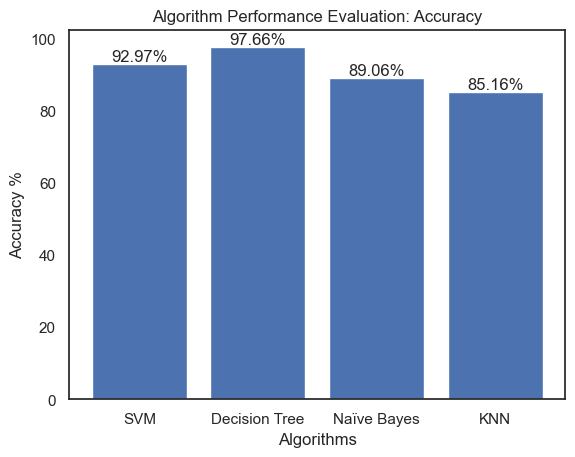

In [40]:
#Compare Accuracy and plot the graph 
x = ['SVM', 'Decision Tree', 'Naïve Bayes', 'KNN']
y = [clfSVMscore *100, clfDTscore *100, clfNBscore *100, clfKNNscore *100]
plt.bar(x,y)

plt.xlabel('Algorithms')
plt.ylabel('Accuracy %')
plt.title('Algorithm Performance Evaluation: Accuracy')

for i, value in enumerate(y):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
plt.show()

In [41]:
# Parse the classification report
clfSVM_crlines = clfSVM_cr.strip().split('\n')
clfDT_crlines  = clfDT_cr.strip().split('\n')
clfNB_crlines  = clfNB_cr.strip().split('\n')
clfKNN_crlines = clfKNN_cr.strip().split('\n')

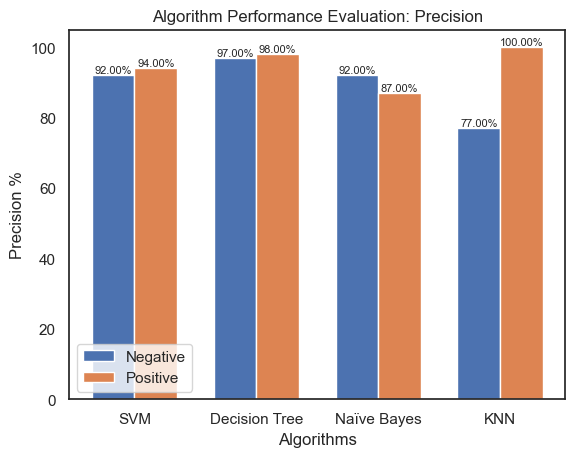

In [42]:
#Compare Precision and plot the graph 
bar_width = 0.35
algorithm  = ['SVM', 'Decision Tree', 'Naïve Bayes', 'KNN']
y0 = [float(clfSVM_crlines[2].split()[1])* 100, float(clfDT_crlines[2].split()[1]) * 100, 
      float(clfNB_crlines[2].split()[1]) * 100, float(clfKNN_crlines[2].split()[1]) * 100]
y1 = [float(clfSVM_crlines[3].split()[1])* 100, float(clfDT_crlines[3].split()[1]) * 100, 
      float(clfNB_crlines[3].split()[1]) * 100, float(clfKNN_crlines[3].split()[1]) * 100]

x = np.arange(len(algorithm))
bar1 = plt.bar(x - bar_width/2, y0, bar_width, label='Negative')
bar2 = plt.bar(x + bar_width/2, y1, bar_width, label='Positive')

plt.xlabel('Algorithms')
plt.ylabel('Precision %')
plt.title('Algorithm Performance Evaluation: Precision')
plt.xticks(x, algorithm)
for bar, prec in zip(bar1 + bar2, y0 + y1):
    plt.text(bar.get_x() + bar.get_width() / 2, prec, f'{prec:.2f}%', ha='center', va='bottom', fontsize=8)
plt.legend(loc = "lower left")
plt.show()

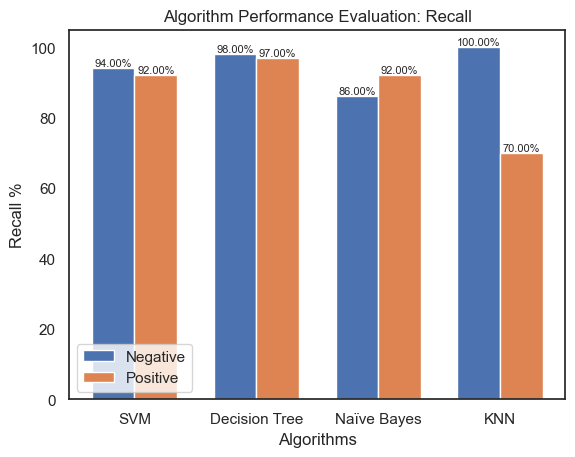

In [43]:
#Compare Recall and plot the graph 
bar_width = 0.35
algorithm  = ['SVM', 'Decision Tree', 'Naïve Bayes', 'KNN']
y0 = [float(clfSVM_crlines[2].split()[2])* 100, float(clfDT_crlines[2].split()[2]) * 100, 
      float(clfNB_crlines[2].split()[2]) * 100, float(clfKNN_crlines[2].split()[2]) * 100]
y1 = [float(clfSVM_crlines[3].split()[2])* 100, float(clfDT_crlines[3].split()[2]) * 100, 
      float(clfNB_crlines[3].split()[2]) * 100, float(clfKNN_crlines[3].split()[2]) * 100]

x = np.arange(len(algorithm))
plt.bar(x - bar_width/2, y0, bar_width, label='Negative')
plt.bar(x + bar_width/2, y1, bar_width, label='Positive')

plt.xlabel('Algorithms')
plt.ylabel('Recall %')
plt.title('Algorithm Performance Evaluation: Recall')
plt.xticks(x, algorithm)

for bar, prec in zip(bar1 + bar2, y0 + y1):
    plt.text(bar.get_x() + bar.get_width() / 2, prec, f'{prec:.2f}%', ha='center', va='bottom', fontsize=8)
plt.legend(loc = "lower left")
plt.show()

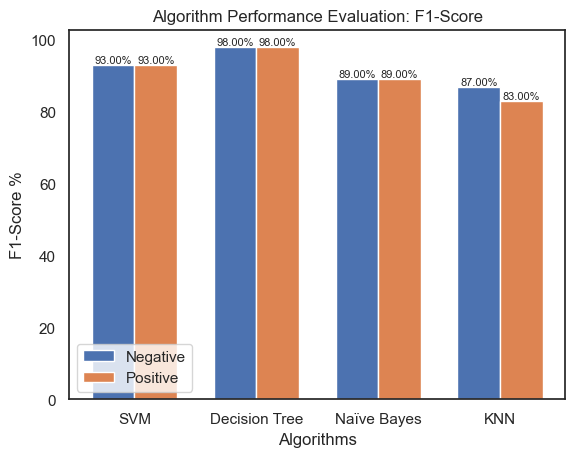

In [44]:
#Compare F1-Score and plot the graph 
bar_width = 0.35
algorithm  = ['SVM', 'Decision Tree', 'Naïve Bayes', 'KNN']
y0 = [float(clfSVM_crlines[2].split()[3])* 100, float(clfDT_crlines[2].split()[3]) * 100, 
      float(clfNB_crlines[2].split()[3]) * 100, float(clfKNN_crlines[2].split()[3]) * 100]
y1 = [float(clfSVM_crlines[3].split()[3])* 100, float(clfDT_crlines[3].split()[3]) * 100, 
      float(clfNB_crlines[3].split()[3]) * 100, float(clfKNN_crlines[3].split()[3]) * 100]

x = np.arange(len(algorithm))
plt.bar(x - bar_width/2, y0, bar_width, label='Negative')
plt.bar(x + bar_width/2, y1, bar_width, label='Positive')


plt.xlabel('Algorithms')
plt.ylabel('F1-Score %')
plt.title('Algorithm Performance Evaluation: F1-Score')
plt.xticks(x, algorithm)

for bar, prec in zip(bar1 + bar2, y0 + y1):
    plt.text(bar.get_x() + bar.get_width() / 2, prec, f'{prec:.2f}%', ha='center', va='bottom', fontsize=8)
    
plt.legend(loc = "lower left")
plt.show()

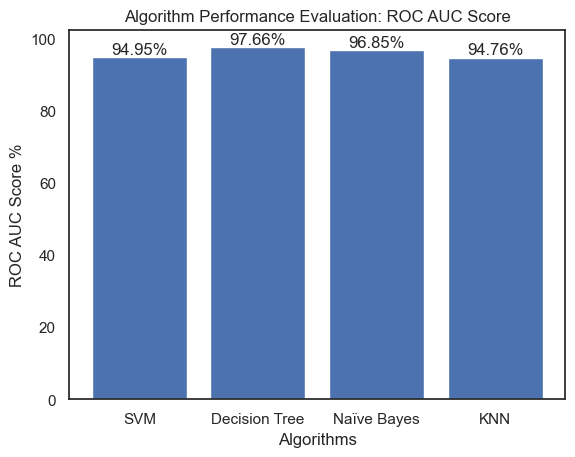

In [45]:
#Compare ROC AUC and plot the graph 
x = ['SVM', 'Decision Tree', 'Naïve Bayes', 'KNN']
y = [svm_auc *100, dt_auc *100, nb_auc *100, knn_auc *100]
plt.bar(x,y)

for i, value in enumerate(y):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
    
plt.xlabel('Algorithms')
plt.ylabel('ROC AUC Score %')
plt.title('Algorithm Performance Evaluation: ROC AUC Score')

plt.show()

In [46]:
#Store Decision Tree Model into pickle format into local directory
import pickle
filename = "dtModel.pkl"

#Save the model to current directory
pickle.dump(clfDT, open(filename, 'wb'))

#Load the model from the direcotry 
loaded_model = pickle.load(open(filename, 'rb'))

loaded_model

DecisionTreeClassifier()

In [47]:
#Use the loaded_model to calculate the accuracy score 
accuracyScore = loaded_model.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracyScore *100))

Accuracy: 97.66%


In [48]:
# Define a function to convert a value to an integer, handling errors by returning 0
def convert_to_numeric(value):
    try:
        return int(value)
    except ValueError:
        return 0  # Handle invalid input as 0
    
#Define a function for diabetes risk prediction
def diabetes_class_predictor(Age,Gender,Polyuria,Polydipsia,Sudden_Weight_Loss,Weakness,Polyphagia,
                        Visual_Blurring,Irritability,Partial_Paresis,Alopecia):
   
    # Convert input values to integers using the defined function
    Age = convert_to_numeric(Age)
    Gender = convert_to_numeric(Gender)
    Polyuria = convert_to_numeric(Polyuria)
    Polydipsia = convert_to_numeric(Polydipsia)
    Sudden_Weight_Loss = convert_to_numeric(Sudden_Weight_Loss)
    Weakness = convert_to_numeric(Weakness)
    Polyphagia = convert_to_numeric(Polyphagia)
    Visual_Blurring = convert_to_numeric(Visual_Blurring)
    Irritability = convert_to_numeric(Irritability)
    Partial_Paresis = convert_to_numeric(Partial_Paresis)
    Alopecia = convert_to_numeric(Alopecia)
    
    # Use a pre-trained model (clfDT) to make a diabetes risk prediction based on input features
    predictor = clfDT.predict([[Age,Gender,Polyuria,Polydipsia,Sudden_Weight_Loss,Weakness,Polyphagia,
                                 Visual_Blurring,Irritability,Partial_Paresis,Alopecia]])

 
    # Generate a prediction message based on the model's prediction
    if (predictor == 0):
        pred =  "You" + "\033[1m" +  " are not at risk for diabetes" + "\033[0m" + "！Well done and please stay healthy!"
        
    else:
        pred = "Unfortunately, there is a" + "\033[1m" + " high probability that you are diabetic." + "\033[0m" + " Please have a healthy lifestyle by keeping weight under \ncontrol,  exercising more and eating a healthy diet."
    
    return pred # Return the prediction message



In [49]:
def main():
    # Define a function to validate binary input (0 or 1)
    def validate_binary_input(prompt):
        while True:
            user_input = input(prompt)
            if user_input == '0' or user_input == '1':
                return user_input
            else:
                print("Please enter 0 or 1 only.")
                
    # Define a function to validate age input (numeric value)
    def validate_age_input(prompt):
        while True:
            user_input = input(prompt)
            if user_input.isdigit():
                return user_input
            else:
                print("Please enter a valid age (numeric value).")

    # Get the user's age input
    Age = validate_age_input("Please enter your age: ")
    
    # Prompt the user to answer questions with binary (0 or 1) responses
    print("Please answer the following questions with 0/1 only (0 - No, 1 - Yes)")
    
    # Get binary responses for various questions
    Gender = validate_binary_input("Gender (0 - Female, 1 - Male): ")
    Polyuria = validate_binary_input("Polyuria: ")
    Polydipsia = validate_binary_input("Polydipsia: ")
    Sudden_Weight_Loss = validate_binary_input("Sudden Weight Loss: ")
    Weakness = validate_binary_input("Weakness: ")
    Polyphagia = validate_binary_input("Polyphagia: ") 
    Visual_Blurring = validate_binary_input("Visual Blurring: ")
    Irritability = validate_binary_input("Irritability: ")
    Partial_Paresis = validate_binary_input("Partial Paresis: ")
    Alopecia = validate_binary_input("Alopecia: ")
    
    # Use the diabetes_class_predictor function to make a prediction based on user inputs
    result = diabetes_class_predictor(Age, Gender, Polyuria, Polydipsia, Sudden_Weight_Loss, Weakness, Polyphagia,
                                      Visual_Blurring, Irritability, Partial_Paresis, Alopecia)
    # Print the prediction result
    print("\n")
    print(result)

    return

main()


Please enter your age: 30
Please answer the following questions with 0/1 only (0 - No, 1 - Yes)
Gender (0 - Female, 1 - Male): 1
Polyuria: 1
Polydipsia: 1
Sudden Weight Loss: 1
Weakness: 1
Polyphagia: 1
Visual Blurring: 1
Irritability: 1
Partial Paresis: 1
Alopecia: 1


Unfortunately, there is a high probability that you are diabetic. Please have a healthy lifestyle by keeping weight under 
control,  exercising more and eating a healthy diet.
